In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
#cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv'
#deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv'

cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

dta_cases = pd.read_csv(cases_url)
dta_deaths = pd.read_csv(deaths_url)

In [24]:
dates = dta_deaths.columns[4:]

"latest available date: " + dates[-1]

'latest available date: 3/27/20'

In [25]:
#dta_deaths.loc[dta_deaths['Country/Region'] == "China"]

In [26]:
dta_cases.insert(0,"region","")
dta_deaths.insert(0,"region","")

In [27]:
dta_cases["region"].loc[dta_cases["Province/State"].notna()] = dta_cases["Country/Region"].loc[dta_cases["Province/State"].notna()] +" "+ dta_cases["Province/State"].loc[dta_cases["Province/State"].notna()]
dta_cases["region"].loc[dta_cases["Province/State"].isna()] = dta_cases["Country/Region"].loc[dta_cases["Province/State"].isna()]

In [28]:
dta_deaths["region"].loc[dta_deaths["Province/State"].notna()] = dta_deaths["Country/Region"].loc[dta_deaths["Province/State"].notna()] +" "+ dta_deaths["Province/State"].loc[dta_deaths["Province/State"].notna()]
dta_deaths["region"].loc[dta_deaths["Province/State"].isna()] = dta_deaths["Country/Region"].loc[dta_deaths["Province/State"].isna()]

In [64]:
#countries = ["Austria","Belgium","Denmark","France","Germany","Italy","Netherlands","Spain","Sweden",
 #           "United Kingdom","US"]
#regions = ["California","New York","Washington","Hubei","United Kingdom"]
regions = ["Austria","United Kingdom","US","China Hubei","Italy","Germany","US","Spain"]

dta = {}
dta["cases"] = {}
dta["deaths"] = {}
#for c in countries:
#    dta["cases"][c] = np.array(dta_cases.loc[dta_cases['Country/Region'] == c].iloc[:,4:-1])[0]
#    dta["deaths"][c] = np.array(dta_deaths.loc[dta_deaths['Country/Region'] == c].iloc[:,4:-1])[0]
    
for r in regions:
    dta["cases"][r] = np.array(dta_cases.loc[dta_cases["region"] == r].iloc[:,5:])[0]
    dta["deaths"][r] = np.array(dta_deaths.loc[dta_deaths["region"] == r].iloc[:,5:])[0]

In [65]:
#all_regions = countries + regions
plot_regions = ["Italy","Spain","United Kingdom", "US","Germany","China Hubei"]

In [66]:
# y axis config
y_max = int(1000*np.ceil(max([max(dta["deaths"][region]) for region in plot_regions]) / 1000.0))
y_min = 5
y_locs_template = np.array([5,10,20,50,100,500,1000,2000,5000,10000,20000,50000,100000])
y_locs = y_locs_template[y_locs_template<=y_max]

In [67]:
x_max = int(10*np.ceil( max([len(dta["deaths"][region][np.where(dta["deaths"][region]>=y_min)]) for region in plot_regions]) /10.0))
x_line = range(x_max+1)

y_line_50 = np.log(y_min) + 0.5*np.arange(0,x_max+1,1)
label_y_50 = y_line_50[np.where(y_line_50 < np.log(y_max))[0][-3]]
label_x_50 = x_line[np.where(y_line_50 < np.log(y_max))[0][-3]]-1

y_line_33 = np.log(y_min) + 0.33*np.arange(0,x_max+1,1)
label_y_33 = y_line_33[np.where(y_line_33 < np.log(y_max))[0][-3]]
label_x_33 = x_line[np.where(y_line_33 < np.log(y_max))[0][-3]]-1

y_line_10 = np.log(y_min) + 0.1*np.arange(0,x_max+1,1)
label_y_10 = y_line_10[np.where(y_line_10 < np.log(y_max))[0][-3]]
label_x_10 = x_line[np.where(y_line_33 < np.log(y_max))[0][-3]]-1

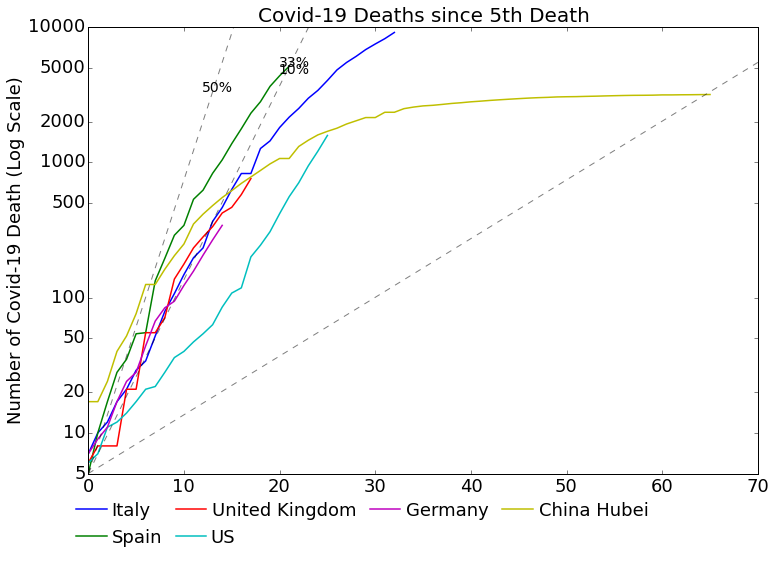

In [68]:
plt.figure(figsize=(12,8))
plt.title("Covid-19 Deaths since 5th Death",fontsize=20)
for region in plot_regions:
    plt.plot(np.log( dta["deaths"][region][np.where(dta["deaths"][region]>=y_min)[0]] ),
             linewidth=1.5,label=region)

plt.plot(x_line,y_line_50, linestyle="--",linewidth=1,alpha=0.5, color="black")
plt.annotate("50%", (label_x_50,label_y_50), fontsize=14)
plt.plot(x_line,y_line_33, linestyle="--",linewidth=1,alpha=0.5, color="black")
plt.annotate("33%", (label_x_33,label_y_33), fontsize=14)
plt.plot(x_line,y_line_10, linestyle="--",linewidth=1,alpha=0.5, color="black")
plt.annotate("10%", (label_x_10,label_y_10), fontsize=14)
    
plt.ylim(np.log([y_min,y_max]))
plt.yticks(np.log(y_locs),y_locs)
plt.ylabel("Number of Covid-19 Death (Log Scale)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.legend(bbox_to_anchor=(-0.05,-0.2),loc='lower left',ncol=4, fontsize=18, frameon=False,
           columnspacing=0.5,handlelength=2.3,handletextpad=0.05)


In [69]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [82]:
def plot_f(region_list):
    y_min = 5
    y_max = int(1000*np.ceil(max([max(dta["deaths"][region]) for region in region_list]) / 1000.0))
    y_locs_template = np.array([5,10,20,50,100,500,1000,2000,5000,10000,20000,50000,100000])
    y_locs = y_locs_template[y_locs_template<=y_max]
    
    x_max = int(10*np.ceil(max([len(dta["deaths"][region][np.where(dta["deaths"][region]>=y_min)[0]]) for region in region_list])/10.0))
    x_line = range(x_max+1)

    y_line_50 = np.log(y_min) + 0.5*np.arange(0,x_max+1,1)
    label_y_50 = y_line_50[np.where(y_line_50 < np.log(y_max))[0][-3]]
    label_x_50 = x_line[np.where(y_line_50 < np.log(y_max))[0][-3]]-1

    y_line_33 = np.log(y_min) + 0.33*np.arange(0,x_max+1,1)
    label_y_33 = y_line_33[np.where(y_line_33 < np.log(y_max))[0][-3]]
    label_x_33 = x_line[np.where(y_line_33 < np.log(y_max))[0][-3]]-1

    y_line_10 = np.log(y_min) + 0.1*np.arange(0,x_max+1,1)
    label_y_10 = y_line_10[np.where(y_line_10 < np.log(y_max))[0][-3]]
    label_x_10 = x_line[np.where(y_line_10 < np.log(y_max))[0][-3]]-1
    
    f, ax = plt.subplots(figsize=(12,8))
    ax.set_title("Covid-19 Deaths since 5th Death",fontsize=20)
    
    for r in region_list:
        ax.plot(np.log(dta["deaths"][r][np.where(dta["deaths"][r]>=y_min)[0]]),
                label=r, linewidth=1.5)
    
    ax.plot(x_line,y_line_50, linestyle="--",linewidth=1,alpha=0.5, color="black")
    ax.annotate("50%", (label_x_50,label_y_50), fontsize=14)
    ax.plot(x_line,y_line_33, linestyle="--",linewidth=1,alpha=0.5, color="black")
    ax.annotate("33%", (label_x_33,label_y_33), fontsize=14)
    ax.plot(x_line,y_line_10, linestyle="--",linewidth=1,alpha=0.5, color="black")
    ax.annotate("10%", (label_x_10,label_y_10), fontsize=14)

    ax.set_ylim(np.log([y_min,y_max]))
    ax.set_yticks(np.log(y_locs))
    ax.set_yticklabels(y_locs)
    ax.set_ylabel("Number of Covid-19 Death (Log Scale)", fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)

    plt.legend(bbox_to_anchor=(-0.05,-0.2),loc='lower left',ncol=4, fontsize=18, frameon=False,
               columnspacing=0.5,handlelength=2.3,handletextpad=0.05)
    
    return ax

regions_sel = widgets.SelectMultiple(
                options=regions,
                value=[regions[0]],
                rows=10,
                description="Regions",
                disabled=False
                )

#selected = interact(plot_f,region_list=regions_sel)

In [83]:
output_box = widgets.interactive_output(
    plot_f,
    {
        "region_list": regions_sel
    },
)

In [84]:
dash = widgets.VBox([output_box,regions_sel])
dash

VBox(children=(Output(outputs=({u'output_type': u'display_data', u'data': {u'image/png': u'iVBORw0KGgoAAAANSUhEUgAAAvsAAAIxCAYAAADT8necAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xl8VOXZ//HPRdhkCbLIqlassoiVNSq4EKuoiFBt1cdWfNrSal1qa/316aN9WqW29qmtVtv+7KK1VK1a8aelBlAUIYosEhSQTVABQfZNCJAQkly/P84ZHIbJMslMZiZ836/XvCY5554z10wmyXXuc933be6OiIiIiIg0Pk3SHYCIiIiIiKSGkn0RERERkUZKyb6IiIiISCOlZF9EREREpJFSsi8iIiIi0kgp2RcRERERaaSU7ItIWphZpZnNTKB9fviYe1IZl3zGzP4evucnpjuWeMys0Mwq0x1HpjCzk8Kf14R0x5IJEv0bI9JYKdkXOUqYWR8z+4OZLTWz3WZ2wMw2mNlkMxtnZs3TEFZdFvqo9WPMrJ2Z/ZeZPW1my82sPEwALqzhcYPM7Hkz2xK+Tx+b2SNm1jmRQM1sfPh8kVtF+N6vNbMpZvYjM+ueyDGTKSq+86tplsmLsTiZHV+14nw+Ym8Xx3lMbRLYpLwn4ec0Op4yM9tuZu+Z2ZNmdpWZNUvGc9UjvjU1NMvaz4dIsjRNdwAiknpmdjdwD2DAHGA6UAx0Bc4H/grcDOQ1YFh9gP0pfo6ewP0E//A/AbYBXagmATCzy4EXgRzgJWAV0Be4CRhtZue4+/oE4ygMbwCtge7AOcBI4GdmNt7d70/wmA3F0h1ANf4TOCbdQSTB34G1cbZ/WEX7hk5gHwY+JeggzCX43b0SGAt8YGZj3b2ogWOKUDIvUgMl+yKNnJn9GBgPrAOujvdP2cwuAf6rIeNy91UN8DRrgQuBhe7+qZn9nSBBjMvMWhKc+OQAX3H3SVH7rgWeAf4v8KUE4yh093vjPN+XgUeB/zUz0pjwZ3JCX6U6nHRlqr+7+5vpDqIKDjzs7uuiN5pZLvBz4DbgVTM7291XpiNAEameynhEGjEzO4kg0S8DLquq983dpwGXxXn8NWb2Zlh6sj+8fH9ndMmPmbU0s0/DkpecKuL4U1gGcFnUtrjlCGbWxcweD4+338wWmlmVCXp13P1Td5/p7p/W8iHDgM7AguhEPzzWP4H3gMuTVcPu7i8CV4Xf3m1mXWPbmNklZjY1LJ8oNbMPzezXZtYuTtsLzOzRsGQp8jNbYmZ3m1mLmLZrgbvDb2dGl2vECdXM7DvhsUrMbLOZ/SVM+GIbnmFmz4YlFqVmttXM3jGzh8ysVh1MZjbGzF43s03hMTZYUJ9/c0y7I2r2LWpsh5kNCMulPjWzfWH7oVU8Z46Z3WRms6Peuw/M7DEzOyWmbVMzu8XM5pnZnvDY75rZrWaWkhMnM/tG1GuNvMbI7YhxLBbU7/8z/NyUmFmRmY1KVjzuvsfdvw88CbQDfhUnhlZmdpeZLTKzvWZWbGZzwhPn2LbNzOy74Wf94/DnvsPMXjOzS2Pa5ofvxYnASTHvxRHjFcysY/h7Efk8LTWzbyTrvRDJdOrZF2ncvknwe/6suy+vrqG7l0V/b2a/BO4kKH35B7CX4ITgl8AlZnaxux9091Iz+ydwI0FZyuSY47QA/gPYDLwS+7QxbTsRlBn1BGYBbxGUvPwZeK2Wr7k+Isn26ir2rwbOAL5IUHpRb+5eaGZvAecCXwb+GNkXJnH3ADuAAmAr0B/4IXCZmQ119+Kow/0I6E3wHhYALcPjjidIEC9y90jC+BBwBTCcqstIIn4DXExQ1vQKweu/ATiF4MpJJN4zgLeBirDtGoKyj1MJysT+Byiv7v0wsxsJft6bgH8D2wlOwPoD3wD+FPOQqso4hhC8H3MIrp58DvgK8LqZDYi+smTByetk4CKCK2D/APYQfA6vIPgsfhi2bUbw3l4MvB+2LQ3fkz8AZ1HN1aMqnGdmZxJcUVoDvO7uO2LaLAR+RvB5WMvhn7/CmLYnEfwcPgKeADoS/A7+O/wMxLavj3sJXu8oM2sb+Tya2bHADGAA8A7wOEEH46XAM2bWz91/GnWcjgTlQrOBaQR/d7oDo4GpZnaDuz8etl1D8F7cHn7/UNRxFsXE1z485gFgItACuAb4m5lVuvuT9Xz9IpnP3XXTTbdGegNeByqBcQk+bmj4uLVA56jtkTr2SuCuqO1nh9uej3Osq8N9v4nZXgnMiNn2aLj9wZjtgwmuTlQCd9fj/fh7eIwvVrF/RLh/XhX7F4X7f1nL5xtfm5gJEqZKYELUtgvCbW8BuTHtvx7u+23M9p41HP+aKuI7v4b3ay1wfMzn4I1wX17U9gfDbaPjHKsdYLV4z94BSoBOcfZ1iPm+EKiI2ZYfxlAJ/GfMvhvD7Y/EbP9luH0S0CxmX7PoWKLes99Fvx6CRPav4b4xCX4+Ym8lwL1VPOaI35uofSdFHeOnMfsuDrdPSeD3ZS3BiduJNbRbH7bLj/PZ+WFM2xbAy2H7/lHbmwPd4xw7F1hCcMLbMk58q6uJK/JePBrzs+oLHASW1fa90E23bL6pjEekcesW3n+S4OPGhfe/cPetkY3uXgH8H4J/oN+O2j6PYCDraDNrH3Osr4f3T1T3hGGP6XUEParjo/e5+zvA0wm+hrqYTTAQ8UwzGxMT3zUEvfoQ9BYm08bw/riobd8L729w9z3Rjd39CWAxwfsVvb2qmUkeDu+PmN2llu5190OfofBzECmXiDeouzR2g7vvdvfaDqasIM4VAHffWcvHA7zlR/ba/i089qGYLSg9u4VgsPhN7n4w5jkPuvv2sG0Tghr1TcAPol+PB1dMfkhwpeGwn0s1FhFcfetJcBXmRIIrJp8CPzGz+2p5nFhrgV/EvI5XCZLyVAzC30Aw7qMTBGUzBIN3i9z9gZg4DhBcMTTga1Hby9x9IzHCz/4Egt+5usS+D7gj5me1guCKTx8za1WHY4pkFZXxiEg8gwiSlhmxO9z9AzPbQFAre+iyPUEyfx9wLWGphZl1AS4B3nX3pTU8Zx+CmVWK/PDSlIg3+OzEgfD4VxCUCURb6O7/ruG54nL3/Wb2fYJeyRfN7CWC8o0+wCiC5GwAwclOMkXqvKOT4aEEvY/XVFEH3hw4zszau/suADNrDXyfYKaUXkCbqGMD9KhjfAvibIsk/9EnPv8kOEmZZGb/j+DK0mx3/yiB5/oHwRWC5WF52JvhMbbVN2Z3LzezLTEx9yHoPZ7n7ptrOGav8LEfEIyxiNemlKDnuEYeMy6E4D193MzeBeYBPzSz3/qRJT01WVTFidV6gjKjZIv9/OYRjgk0s/Fx2kem6zzsfTKzfgQTBZxPUFLXMuZxdZmm9gN33xtn+3qCuNuT+lnBRNJKyb5I47aJIJk5PsHHRQZ/bqrmuMcDxxJM4QnBQL2fEyTkkbrq6whKPqrt1Y95zi1V7I+XiH2Jw08APHyuOiX7AO7+lJmtB/6boCTkMmB5+DxdCJL9rVUeoG4iSUx0QtuR4L2rbhExJ0jod4VXRmYQJFpLgGfD4x0kSGruISihqIt4A5wjPe+HBmW7e5GZnUdQm38VcD2Ama0EfubBIOdquftDZradoLf9ewR12W5mbwD/FV7lqWvMkbijB5IfG95vqMUxO4b3p/LZ4OZYTjC9ap25+0IzKyIYMD6UmHEwtVDda0/FFf3Yz2/kfcqj6t74w94nMzub4PPbhOAkcRLBVb5KYCDB73pdPr/VvRdw+GdBpFFSsi/SuM0iqP2+kKCEobZ2h/fdiD9YtVtMO9x9g5nNAC4ys14eDID8OkGt/TMJPGeXKvYfMVONu3+ToAwiqTwYwFgYu93MImUhyZ5T/ILw/u2obbvDWDrV8hhfIkisJrj7t6J3mFk3qj9pSJqwpGt0ePIxhGBA5m0EgzK3ufvrtTjGU8BTFsw4N

In [85]:
from ipywidgets.embed import embed_minimal_html

In [86]:
embed_minimal_html('export.html', views=[dash], title='chart export')

## New Cases

In [71]:
def make_chng_wk(data):
    weeks = np.arange(7,len(data),7)
    return [data[w]-data[w-7] for w in weeks]

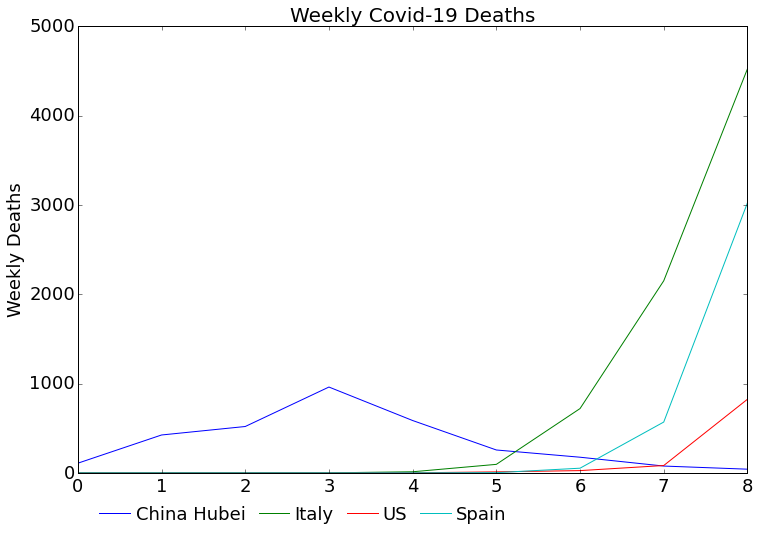

In [72]:
plt.figure(figsize=(12,8))
plt.title("Weekly Covid-19 Deaths",fontsize=20)

for region in ["China Hubei","Italy","US","Spain"]:
    dta_tmp = dta["deaths"][region]
    plt.plot(make_chng_wk(dta_tmp), label=region)

plt.legend(bbox_to_anchor=(-0,-0.15),loc='lower left',ncol=4, fontsize=18, frameon=False,
    columnspacing=0.5,handlelength=2.3,handletextpad=0.05)
plt.ylabel("Weekly Deaths", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)



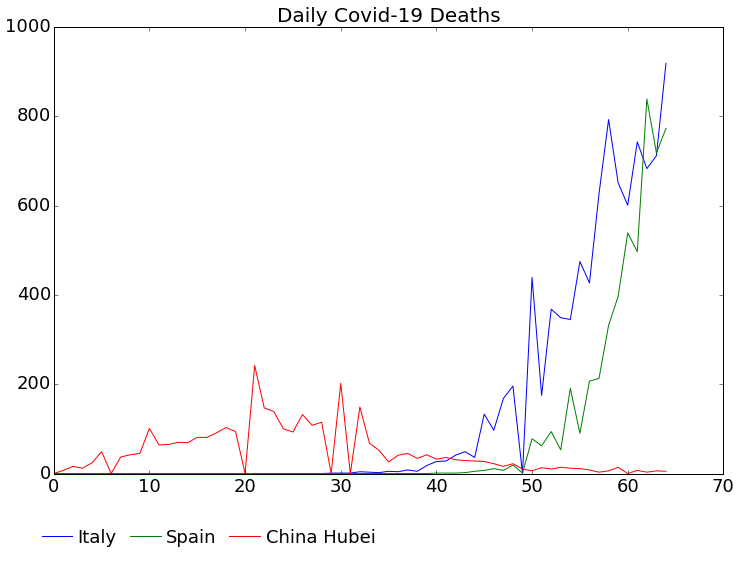

In [73]:
plt.figure(figsize=(12,8))
plt.title("Daily Covid-19 Deaths",fontsize=20)

plt.plot(np.diff(dta["deaths"]["Italy"]), label="Italy")
plt.plot(np.diff(dta["deaths"]["Spain"]), label="Spain")
plt.plot(np.diff(dta["deaths"]["China Hubei"]), label="China Hubei")
    
#plt.ylim(np.log([y_min,y_max]))
#plt.yticks(np.log(y_locs),y_locs)
#plt.ylabel("Number of Covid-19 Death (Log Scale)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.legend(bbox_to_anchor=(-0.05,-0.2),loc='lower left',ncol=4, fontsize=18, frameon=False,
           columnspacing=0.5,handlelength=2.3,handletextpad=0.05)